In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [5]:
fake = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/Fake.csv")
true = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/True.csv")

In [6]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
fake["subject"].value_counts()

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

In [8]:
true["subject"].value_counts()

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

In [9]:
fake["falseness"] = 1
true["falseness"] = 0

In [10]:
#we will combine two datasets and remove the extra index
df = pd.concat([fake,true]).reset_index(drop=True)

In [11]:
#check the dataframe for combination validity
df.head()
df.tail()

,title,text,subject,date,falseness
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",0


In [12]:
#here we can see the "falseness" column in our category which is used as the labels
df.falseness

0        1
1        1
2        1
3        1
4        1
        ..
44893    0
44894    0
44895    0
44896    0
44897    0
Name: falseness, Length: 44898, dtype: int64

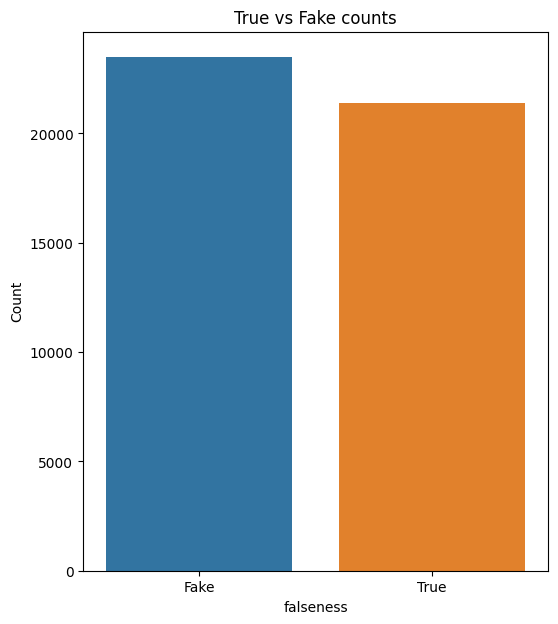

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

df2 = df.copy()
df2['falseness'] = df2['falseness'].map({0: 'True', 1: 'Fake'})

plt.figure(figsize=(6,7))
ax = sns.countplot(x='falseness', data=df2)
ax.set_ylabel('Count')
ax.set_title('True vs Fake counts')
plt.show()


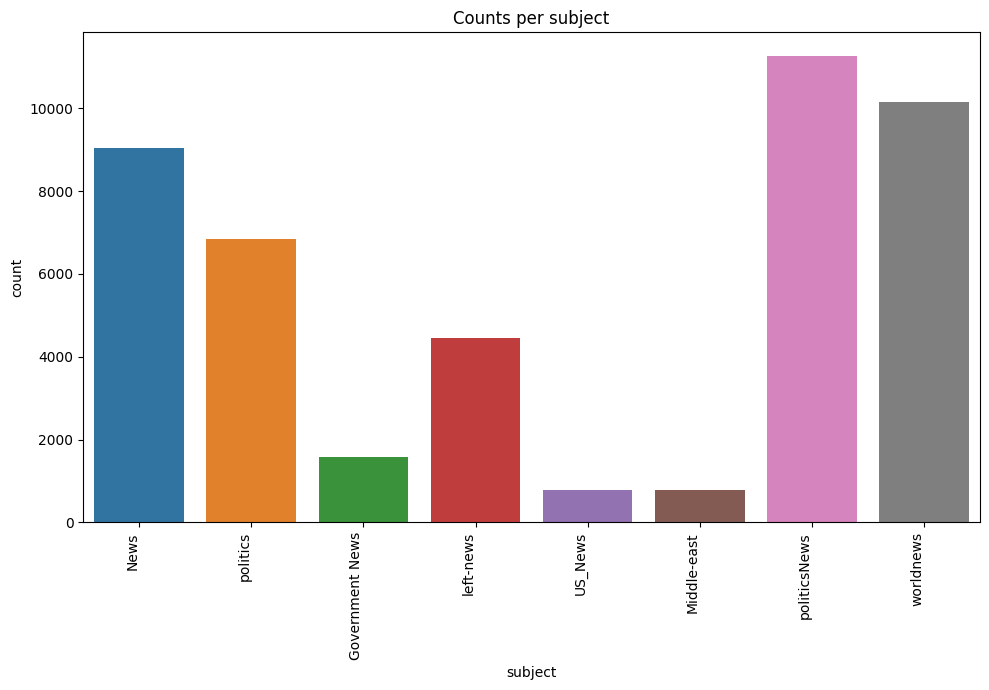

In [14]:
plt.figure(figsize=(10,7))
sns.countplot(x='subject', data=df)    
plt.xticks(rotation=90, ha='right')         
plt.title('Counts per subject')
plt.tight_layout()
plt.show()


In [15]:
df = df[["text","falseness"]]

In [16]:
df.head()

,text,falseness
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1


In [17]:
df.tail()

,text,falseness
44893,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0
44894,"LONDON (Reuters) - LexisNexis, a provider of l...",0
44895,MINSK (Reuters) - In the shadow of disused Sov...,0
44896,MOSCOW (Reuters) - Vatican Secretary of State ...,0
44897,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,0


In [18]:
len(df.isna().sum())

2

In [19]:
#Here we check for NaN, None values in our dataframe
df.isna().sum()*100/len(df)

text         0.0
falseness    0.0
dtype: float64

In [20]:
#We don't have NaN, None values but empty string are considered valid for pandas 
#but we still can't count them as proper data points 
blanks = []

for index, text in df["text"].items():  
    if text.isspace():  
        blanks.append(index)
len(blanks)

631

In [21]:
df["text"][8972]

'If there s one couple that Republicans love to attack, it s the Clintons. For decades, they have been under constant dubious scrutiny, more so than almost any other politician. Why? Because they have an incredible history of getting stuff done. Stuff their critics would rather not see be getting passed, and work they would rather not see being accomplished. If Republicans can successfully make a scandal of the Clintons to try to discredit all their accomplishments, that will help Republicans beat Hillary in 2016. It s political theater at its best and worst.Appearing on the campaign trail for this first time this election cycle in Nashua, New Hampshire, was former President Bill Clinton. If anyone can explain the exemplary work Hillary has done throughout her long career, it s Bill. And while many like to say Hillary changes her support with the wind of any popular idea, or copies other candidates, they clearly don t know the work she s done, and how she often set the precedent for no

In [22]:
#To clean the data we will remove the blank data from our dataframe
df.drop(blanks, inplace=True)

In [23]:
from nltk.corpus import stopwords #built-in list of common words
from nltk.stem import WordNetLemmatizer #base form (lemma) like "running" to "run"
import spacy
import re

## Creating a list of stop words
So here we will use the list of stop words in both **Spacy** and **NLTK** to make a larger list and run our data through and clean it.

In [24]:
nlp = spacy.load("en_core_web_sm")
lemma=WordNetLemmatizer()

In [25]:
l1 = nlp.Defaults.stop_words
print(len(l1))
l2 = stopwords.words("english")
print(len(l2))
Stopwords = set((set(l1)|set(l2)))
print(len(Stopwords))

326
198
401


Now that we have this list, we'll use the following function to first, change the words into lower case and turn ther written words into their usual or prefered format. Then, we will split the text and add the words that aren't in the stopwords list into the output string.

In [26]:
def cltxt(text):
    string = ""
    
    text = text.lower()
    
    wdict ={"i'm":"i am",
           "he's":"he is",
           "she's":"she is",
            "that's":"that is",
            "what's":"what is",
            "where's":"where is",
            "\'ll":"will",
            "\'ve":" have",
            "\'re":" are",
            "\'d":" would",
            "won't":"will not",
            "can't":"cannot"
           }
    for i in wdict:
        text = re.sub(i , wdict[i],text)
    text=re.sub(r"[-()\"#!@$%^&*{}?.,:]"," ",text)
    text=re.sub(r"\s+"," ",text)
    text=re.sub('[^A-Za-z0-9]+',' ', text)

    for word in text.split():
        if word not in Stopwords:
            string += lemma.lemmatize(word)+" "
    return string        

In [27]:
example = df["text"][8971]
cltxt(example)

'thursday blaine cooper anti government terrorist participating armed takeover bird sanctuary oregon snack social medium according terrorist group known ya llqueda armed militant decided seize 100 year old wildlife refuge symbol wrong america able set fire public land turn freeloading cattle loose feed american taxpayer ride atv ancient archaeological site way according ammon bundy malheur national wildlife refuge established 1908 atv came market u 1960 stupidity right wing extremism timeless case needed proof dumbest armed takeover bird sanctuary anti government terrorist told america plan stay holed inside visitor building malheur national wildlife refuge long take year asking people send snack secretive press conference held second day ya llqueda armed occupation federal wildlife refuge bundy told press plan plan going month accomplish kind idiotic plan involves living visitor building wildlife sanctuary month year necessary include packing snack image credit screen capture blaine c

In [28]:
from wordcloud import WordCloud

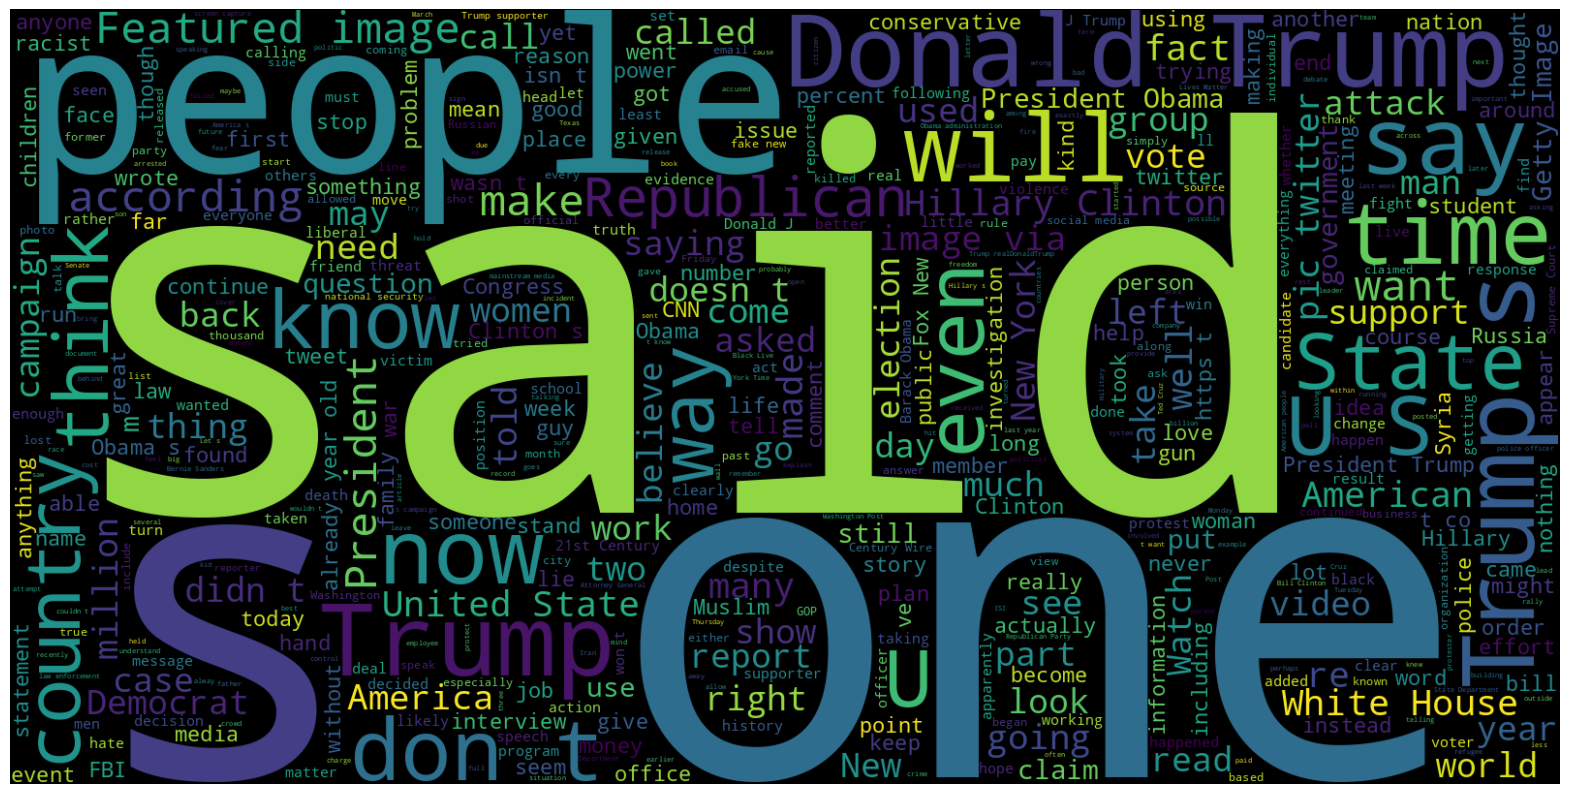

In [31]:
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(df[df.falseness == 1].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

In [35]:
#split the data and get ready to compile your model
from sklearn.model_selection import train_test_split

X = df["text"]
y = df["falseness"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [36]:
from sklearn.pipeline import Pipeline #for creating a pipeline
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.svm import LinearSVC

In [38]:
text_clf = Pipeline([("tfidf", TfidfVectorizer()),("clf",LinearSVC())])

text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In the text_clf pipeline, we are first converting text into vectors and then train the classifier

In [39]:
predictions = text_clf.predict(X_test)

In [40]:
from sklearn import metrics

print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7047
           1       0.99      0.99      0.99      7562

    accuracy                           0.99     14609
   macro avg       0.99      0.99      0.99     14609
weighted avg       0.99      0.99      0.99     14609



In [41]:
print(metrics.accuracy_score(y_test, predictions))

0.9941816688342803


In [42]:
print(metrics.confusion_matrix(y_test, predictions))

[[7009   38]
 [  47 7515]]


In [55]:
t1 = X_test[1000]
t1_falseness = y_test[1000]
test_pred = text_clf.predict([t1])
print(f"This is the prediction:{test_pred} and this is the lable:{t1_falseness}")

This is the prediction:[1] and this is the lable:1
